# Taking our simulated data and augmenting it!

### First, let's look at our data

In [4]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


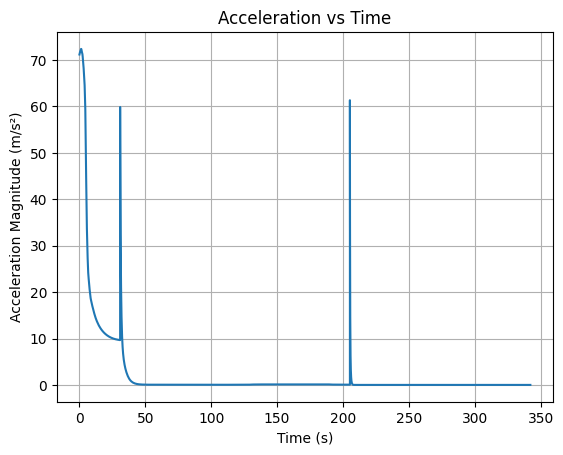

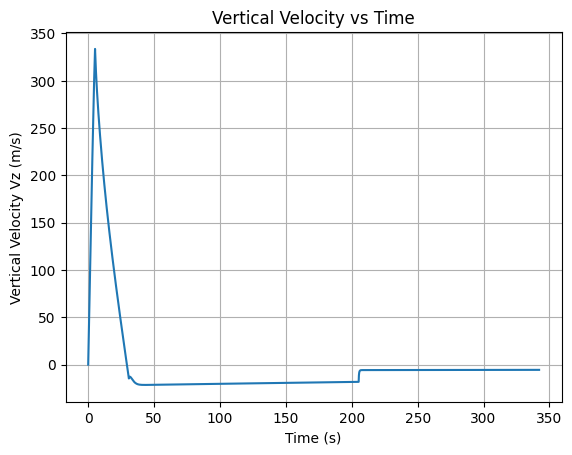

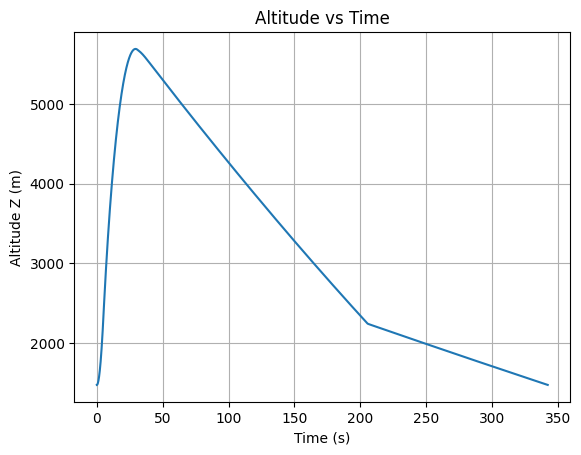

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
# If the file has the commented header line starting with '#',
# pandas will automatically ignore it
df = pd.read_csv(
    "calisto_flight_data.csv",
    comment="#",
    names=["time", "accel_mag", "vz", "z"]
)

# --- Plot 1: Acceleration magnitude vs time ---
plt.figure()
plt.plot(df["time"], df["accel_mag"])
plt.xlabel("Time (s)")
plt.ylabel("Acceleration Magnitude (m/s²)")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.show()

# --- Plot 2: Vertical velocity vs time ---
plt.figure()
plt.plot(df["time"], df["vz"])
plt.xlabel("Time (s)")
plt.ylabel("Vertical Velocity Vz (m/s)")
plt.title("Vertical Velocity vs Time")
plt.grid(True)
plt.show()

# --- Plot 3: Altitude vs time ---
plt.figure()
plt.plot(df["time"], df["z"])
plt.xlabel("Time (s)")
plt.ylabel("Altitude Z (m)")
plt.title("Altitude vs Time")
plt.grid(True)
plt.show()


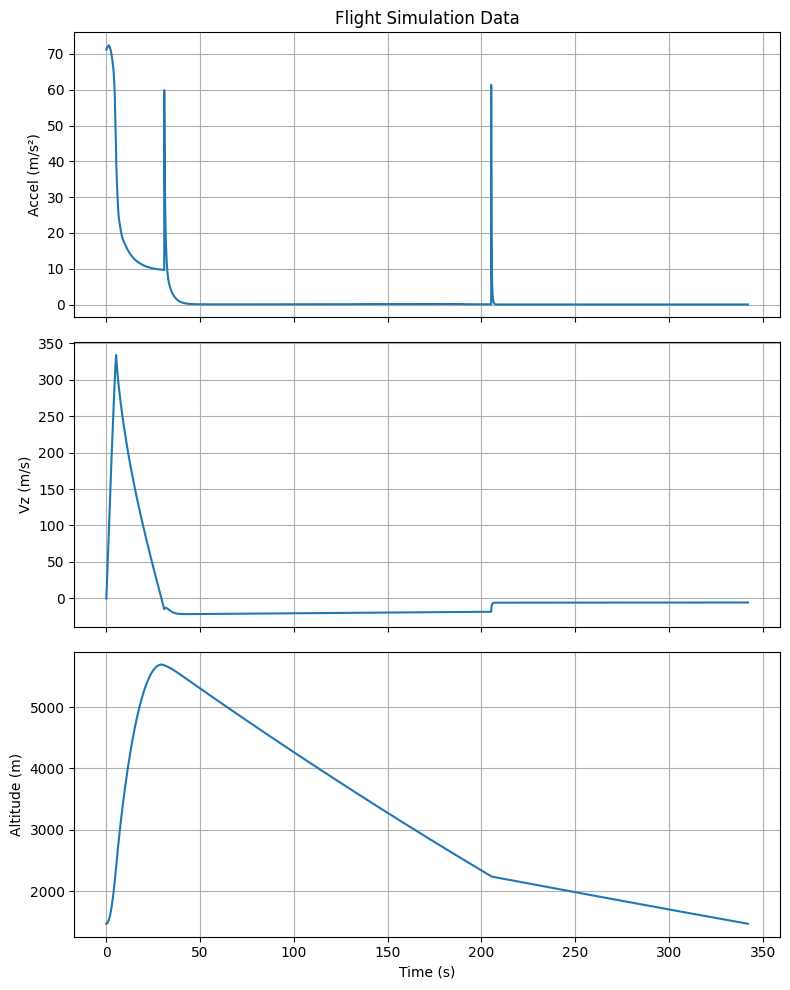

In [6]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 10))

axs[0].plot(df["time"], df["accel_mag"])
axs[0].set_ylabel("Accel (m/s²)")
axs[0].set_title("Flight Simulation Data")
axs[0].grid(True)

axs[1].plot(df["time"], df["vz"])
axs[1].set_ylabel("Vz (m/s)")
axs[1].grid(True)

axs[2].plot(df["time"], df["z"])
axs[2].set_ylabel("Altitude (m)")
axs[2].set_xlabel("Time (s)")
axs[2].grid(True)

plt.tight_layout()
plt.show()


### Add Gaussian noise (white noise) and low-frequency drift (modeled with random walk)

In [14]:
import numpy as np

def add_gps_noise(time, z, sigma_white=1.5, sigma_rw=0.05):
    dt = np.diff(time, prepend=time[0])

    # Random walk bias
    bias = np.cumsum(np.random.normal(0, sigma_rw * np.sqrt(dt)))

    # White noise
    white = np.random.normal(0, sigma_white, size=len(z))

    return z + bias + white


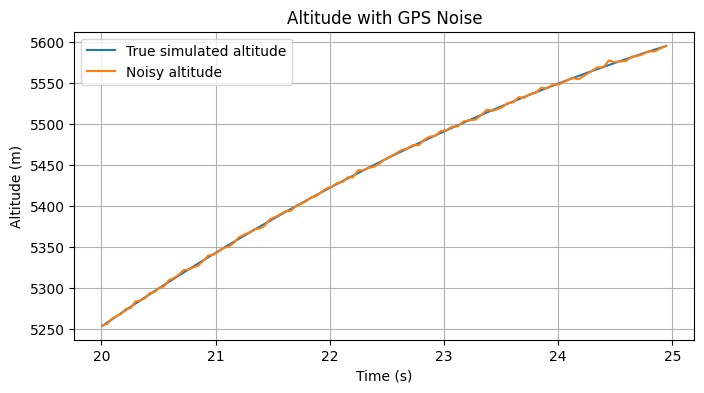

In [19]:
#let's plot it 
#another copy of data
df2 = pd.read_csv(
    "calisto_flight_data.csv",
    comment="#",
    names=["time", "accel_mag", "vz", "z"]
)
df2["z_gps"] = add_gps_noise(df2["time"].values, df2["z"].values)



t_start = 20
t_end = 25

mask = (df2["time"] >= t_start) & (df2["time"] <= t_end)

plt.figure(figsize=(8, 4))
plt.plot(df["time"][mask], df["z"][mask], label="True simulated altitude")
plt.plot(df2["time"][mask], df2["z_gps"][mask], label="Noisy altitude")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title("Altitude with GPS Noise")
plt.legend()
plt.grid(True)
plt.show()